Laboratorio #2 \\
David Hernández, María Solá, Kevin Torregrosa

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso

# 1.Elección de Dataset

Advertising Budget and Sales

https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset/data

In [26]:
path = "Advertising Budget and Sales.csv"
df = pd.read_csv(path)

# Display the first few rows
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
df.shape
# 200 filas y 5 columnas

(200, 5)

In [28]:
df.isnull().sum()
# confirmar muestras nulas

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


# **Análisis**:
El dataset presenta 3 variables independientes
+ Presupuesto de Publicidad en TV (TV Ad Budget)
+ Presupuesto de Publicidad Radial (Radio Ad Budget)
+ Presupuesto de Publicidad en Periódicos (Newspaper Ad Budget)

Estas variables buscan predecir a la variable dependiente Ventas (Sales) por medio de 200 muestras, ninguna de ellas es nula

# 2.Relación de características

In [29]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

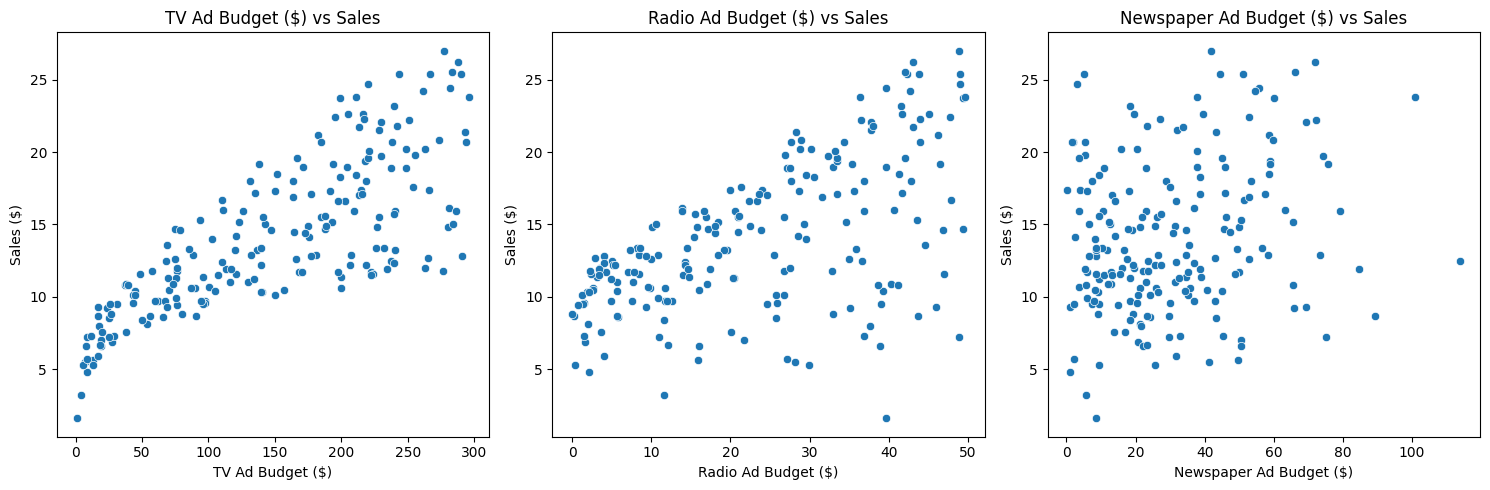

In [30]:
# Análisis Bivariado
#advertising_features = ['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']
advertising_features = df.columns[1:-1]
plt.figure(figsize=(15, 5))

# Loop through features to create scatter plots
for i, feature in enumerate(advertising_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=feature, y='Sales ($)', data=df)
    plt.title(f'{feature} vs Sales')

plt.savefig("Features Vs Sales")
plt.tight_layout()
plt.show()

**Interpretación:**

Entre las primeras dos variables se pueden percibir diferentes grados de correlación lineal positiva, mientras que para la tercera díficilmente se atisba correlación.

En el caso de TV la correlación es más fuerte para el primero, como evidencia la concentración de puntos donde ambas variables son bajas y altas.

Para el presupuesto radial, se muestra también una tendencia de pendiente positiva, pero presenta mucha más dispersión o datos atípicos.

Por último, el presupuesto de periódicos muestra casi todos los valores de ventas (tanto altos como bajos) debajo de presupuestos de 60$. Esto lleva a identificar una posible independecia entre las variables o correlación nula.

# 3.

In [31]:
X = df.drop(['Unnamed: 0','Sales ($)'],axis=1)  # Features
y = df['Sales ($)']

In [32]:
X

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


## 3.1 Train vs Test
1. 70-30
2. 50-50
3. 40-60

In [33]:
def evaluar_modelo(model,X_train, X_test, y_train, y_test):
  # Predecir
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Calcular R^2
  train_score = r2_score(y_train, y_train_pred)
  test_score = r2_score(y_test, y_test_pred)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  print(f"R² score on training data: {train_score:.2f}")
  print(f"R² score on test data: {test_score:.2f}")
  print(f"MSE on training data: {train_mse:.2f}")
  print(f"MSE on test data: {test_mse:.2f}")

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
model = LinearRegression().fit(X_train, y_train)
evaluar_modelo(model,X_train, X_test, y_train, y_test)

R² score on training data: 0.91
R² score on test data: 0.86
MSE on training data: 2.48
MSE on test data: 3.80


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
evaluar_modelo(model,X_train, X_test, y_train, y_test)

R² score on training data: 0.90
R² score on test data: 0.88
MSE on training data: 2.66
MSE on test data: 3.09


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
evaluar_modelo(model,X_train, X_test, y_train, y_test)

R² score on training data: 0.90
R² score on test data: 0.89
MSE on training data: 2.95
MSE on test data: 2.82


¿De qué forma afecta el desempeño del modelo el usar diferentes proporciones de train/test set?

**Conclusión**


1.   **70-30**:  El modelo tiene un muy buen ajuste en entrenamiento pero baja bastantes puntos (0.5) con datos nuevos (overfitting), siendo altamente preciso en entrenamiento según el MSE
2.   **50-50**: El modelo se ajusta peor en entrenamiento en 0.1 pero mejora en 0.2 con los datos de prueba, por lo que se reduce el overfitting
3. **40-60**: El modelo mantiene su puntaje en entrenamiento pero mejora el de prueb, teniendo además el MSE más bajo para datos de pruieba

Podemos ver que reducir el porcentaje asignado a datos de entrenamiento tiene efectos positivos en reducir overfitting, como se espera cuando el modelo no se acostumbra demasiado a los ruidos y datos atípicos del entrenamiento, y puede generalizar adecuadamente.


## 3.2 Cambio de metodo de optimización

Método: Gradiente descendiente estocástico, en vez de mínimos cuadrados (método usado en la regresión lineal)

In [37]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)
# Usar Gradiente descendiente estocástico
model = SGDRegressor(max_iter=1000, tol=1e-5, learning_rate='optimal')  # You can also tune other hyperparameters

# Fit the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)


In [38]:
evaluar_modelo(model,X_train, X_test, y_train, y_test)

R² score on training data: -2995154389983640591949365248000.00
R² score on test data: -2918938004966764848955177041920.00
MSE on training data: 84753865053652145242780957933568.00
MSE on test data: 76459292511626883005619283951616.00


¿Su modelo presenta algún cambio?

**Conclusión**
Podemos observar en el MSE tiene valores altos lo que indica un error en predecir ventar, los datos no se ajustan correctamente, los R^2 son negativos lo que significa que las predicciones no tienen valor(no es capaz de predecir las ventas), estos resultados pésimos muestran que el método de gradiente descendiente estocastico no es apropiado para el modelo.

## 3.3 Regularizacion

Lasso L1 sin ajustar alpha

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
evaluar_modelo(model,X_train, X_test, y_train, y_test)

R² score on training data: -3190869226237324216743359414272.00
R² score on test data: -2583815394530765610263389405184.00
MSE on training data: 83731573317781562509217077657600.00
MSE on test data: 70550067353299695185169355898880.00


Ajustando alpha

In [40]:
#Escalar datos (volver media 0 y desviación estándar 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar validación cruzada para mejorar alpha
from sklearn.linear_model import LassoCV

# Probar alphas
lasso_cv_model = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
lasso_cv_model.fit(X_train_scaled, y_train)

# Obtener mejor alpha
best_alpha = lasso_cv_model.alpha_
print(f"Best alpha: {best_alpha}")

# Evaluar modelo
y_train_pred = lasso_cv_model.predict(X_train_scaled)
y_test_pred = lasso_cv_model.predict(X_test_scaled)

# Calcular R² y MSE
from sklearn.metrics import r2_score, mean_squared_error
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"R² score on training data: {train_r2}")
print(f"R² score on test data: {test_r2}")
print(f"MSE on training data: {train_mse}")
print(f"MSE on test data: {test_mse}")


Best alpha: 0.1
R² score on training data: 0.904619504604502
R² score on test data: 0.8646258647835885
MSE on training data: 2.502878801056975
MSE on test data: 3.696337740547821


. ¿De qué forma afecta el desempeño del modelo usar un método de regularización?
El uso del método de regularización Lasso (L1) impacta positivamente el desempeño del modelo al reducir el sobreajuste y mejorar la generalización. Inicialmente, sin ajustar el parámetro alpha, los resultados fueron inestables, con valores negativos de R² y errores cuadráticos medios (MSE) extremadamente altos, lo que sugiere un modelo incapaz de predecir correctamente. Sin embargo, tras escalar los datos y aplicar validación cruzada con LassoCV, se identificó un alpha óptimo de 0.1. Con este ajuste, el R^2 en los datos de entrenamiento y prueba alcanzó 0.90 y 0.86, respectivamente, mientras que los MSE disminuyeron a 2.50 y 3.69. Esto muestra que la regularización Lasso controla la complejidad del modelo al penalizar coeficientes irrelevantes, logrando así un equilibrio adecuado entre sesgo y varianza.

## 3.4 Entrenamiento Personalizado
Distribución: 70 train vs 30 test \\
Optimización: Coordinate Descent \\
Regularización: Lasso CV

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error

# Paso 1: Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Paso 2: Escalar datos (volver media 0 y desviación estándar 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 3: Aplicar Lasso con validación cruzada
lasso_cv_model = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
lasso_cv_model.fit(X_train_scaled, y_train)

# Obtener mejor alpha
best_alpha = lasso_cv_model.alpha_
print(f"Best alpha: {best_alpha}")




Best alpha: 0.1


In [42]:
coefficients = lasso_cv_model.coef_
intercept = lasso_cv_model.intercept_

# Mostrar pesos/coeficientes e intercepto
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [3.59030605 2.83747278 0.06852482]
Intercept: 14.497142857142858


¿Cuál es el significado de la magnitud y signo de estos valores?

El modelo entrenado utilizando una proporción del 70% para entrenamiento y 30% para prueba, optimizado mediante Coordinate Descent y con regularización LassoCV, arrojó un intercepto de 14.4971 y coeficientes [3.5903, 2.8375, 0.0685]. El intercepto indica el valor esperado de la variable objetivo cuando todas las variables predictoras tienen un valor de 0 (en su escala estandarizada). Los coeficientes reflejan la magnitud y el signo del impacto de cada predictor: un coeficiente positivo, como los observados (3.5903 y 2.8375), sugiere que un aumento en esas variables se traduce en un incremento en la respuesta. Por otro lado, el coeficiente cercano a cero (0.0685) indica que dicha variable tiene una influencia prácticamente nula en la predicción. En general, la regularización Lasso ha reducido algunos coeficientes, eliminando aquellos de menor relevancia, lo que hace que el modelo se más sencillo y menos propenso al sobreajuste.

## 3.5 Evaluación

In [43]:
# Paso 4: Evaluar con el mejor alpha
y_train_pred = lasso_cv_model.predict(X_train_scaled)
y_test_pred = lasso_cv_model.predict(X_test_scaled)

# Calcular R² y MSE
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"R² score on training data: {train_r2:.2f}")
print(f"R² score on test data: {test_r2:.2f}")
print(f"MSE on training data: {train_mse:.2f}")
print(f"MSE on test data: {test_mse:.2f}")

R² score on training data: 0.90
R² score on test data: 0.86
MSE on training data: 2.50
MSE on test data: 3.70


¿Cómo se interpretan estos valores?
El modelo entrenado con regularización Lasso logró un R² de 0.90 en el conjunto de entrenamiento y 0.86 en el de prueba, lo que indica que captura el 90% de la variabilidad en los datos de entrenamiento y el 86% en los de prueba, demostrando un buen equilibrio entre ajuste y generalización. Los MSE obtenidos, de 2.50 en entrenamiento y 3.70 en prueba, reflejan que los errores de predicción son bajos, lo que quiere decir que el modelo es preciso. La combinación óptima para invertir se encontró en televisión y radio, con mayor impacto en televisión, mientras que el coeficiente del periódico fue reducido a 0, destacando su baja relevancia en la predicción. Esto evidencia que la regularización Lasso fue efectiva en eliminar variables poco significativas y asi se logra mantener las más relevantes para el modelo.

# 4

In [44]:
def predicciones(tv, radio, newspaper, modelo):
    tv_budget = tv
    radio_budget = radio
    newspaper_budget = newspaper

    # Lista de variables independientes
    new_data = [[tv_budget, radio_budget, newspaper_budget]]

    # Realizar predicción
    predicted_sales = modelo.predict(new_data)

    print(f"Predicted Sales: ${predicted_sales[0]:.2f}")

In [45]:
predicciones(0,0,0,lasso_cv_model)

Predicted Sales: $14.50


In [46]:
predicciones(1,0,0,lasso_cv_model) # invertir en TV

Predicted Sales: $18.09


In [47]:
predicciones(0,1,0,lasso_cv_model) # invertir en Radio

Predicted Sales: $17.33


In [48]:
predicciones(0,0,1,lasso_cv_model) # invertir en periódicos

Predicted Sales: $14.57


# Conclusiones

Podemos decir que la mejor estrategia de inversión es enfocarse en televisión y radio, siendo la televisión el medio más efectivo para aumentar las ventas. Invertir solo en televisión lleva las ventas de $\$14.50$ a $\$18.09$, mientras que con radio suben a $\$17.33$. Por otro lado, los periódicos apenas generan un cambio, con las ventas pasando de $\$14.50$ a $\$14.57$, lo que indica que este medio tiene poco impacto en comparación con los otros, por ello podemos decir que el uso de la regularización Lasso ayudó a simplificar el modelo eliminando las variables menos importantes. Esto dejó claro que lo mejor es invertir en televisión y radio, enfocándose más en televisión, y evitar gastar recursos en periódicos, ya que no aportan mucho a las ventas.

#Referencias


https://www.kaggle.com/code/sheemamasood/sales-prediction-accuracy98